In [1]:
# importing all libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# creating a small Linear Regression dataset of 1 input and 1 output
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=15)

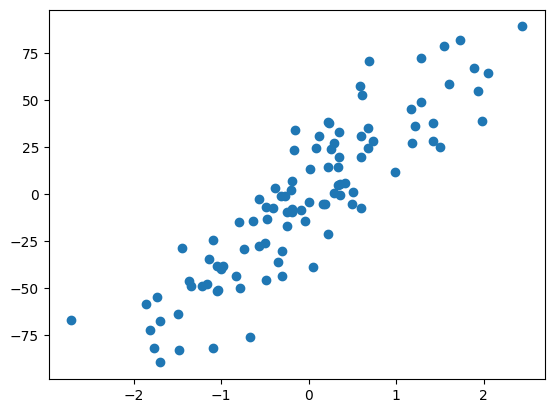

In [3]:
plt.scatter(X,Y)

In [4]:
from sklearn.linear_model import Lasso

C:\Users\arnab\AppData\Local\Temp\ipykernel_13856\4215617413.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(X,Y)
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e+04, tolerance: 1.729e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


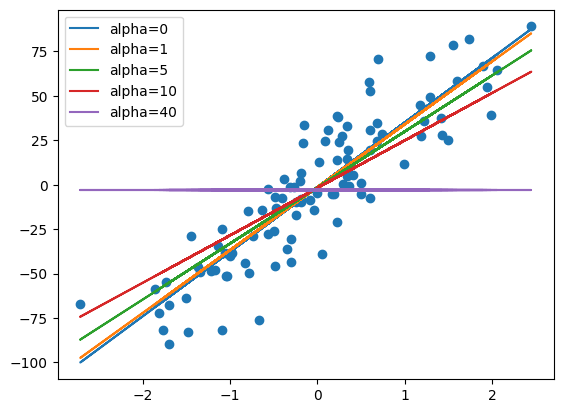

In [9]:
alphas = [0,1,5,10,40]
plt.scatter(X,Y)
for i in alphas:
    lr = Lasso(alpha=i)
    lr.fit(X,Y)
    plt.plot(X,lr.predict(X),label='alpha={}'.format(i))
plt.legend()
plt.show()

In [ ]:
# here we can see that as we increase the value of alpha the coeff value are decreasing and at a time it can be 0

In [16]:
class MyLasso:
    
    def __init__(self,alpha=10):
#       initializing m and b to none
        self.m = None
        self.b = None
        self.alpha=alpha
        
    def fit(self,X_train,y_train):
#       here we have to calculate m and b value using OLS(Ordinary Least Square method) 
#       where b = Y(mean) - mX(mean) and 
#       m = (sum) (X-X(mean))*(Y-Y(mean)) + alpha / (X-X(mean))^2  (for m<0)
#       m = (sum) (X-X(mean))*(Y-Y(mean)) - alpha / (X-X(mean))^2  (for m>0)

        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))-self.alpha
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = (num)/den
#       as here alpha is added in the numerator part so here the coeff can be 0 when (X-X(mean))*(Y-Y(mean)) == alpha
        self.b = y_train.mean() - (self.m * X_train.mean())
#         print(self.m)
#         print(self.b)       
    
    def predict(self,X_test):
#         print(X_test)
        
        return self.m * X_test + self.b # calculating Y = mX + b

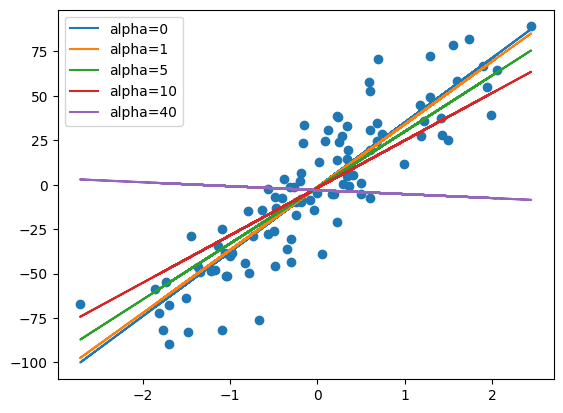

In [17]:
alphas = [0,1,5,10,40]
plt.scatter(X,Y)
for i in alphas:
    lr = MyLasso(alpha=i)
    lr.fit(X,Y)
    plt.plot(X,lr.predict(X),label='alpha={}'.format(i))
plt.legend()
plt.show()